# Convolutional Neural Network

### By Jake Haugen for DS785

## Load Packages

In [4]:
import keras
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten, MaxPooling2D, InputLayer, BatchNormalization
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf

seed = 2022
# Get the path to the brain tumor dataset
data_path = r'C:\Users\Jake\iCloudDrive\Documents\DS785\brain_tumor\Brain Tumor Data Set'
#data_path = r'/Users/jhaugen/Documents/DS785/brain_tumor/Brain Tumor Data Set'

#Needed if running in Google Colab
#from google.colab import drive
#drive.mount('/content/drive')

# Get the path to the brain tumor dataset
#data_path = r'/content/drive/My Drive/Brain Tumor Data Set'

## Define pre-processing and load in training/validation data

In [5]:
data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,  # normalize images
    validation_split=0.2,  #identify the percentage of images for validation
    rotation_range=15, #set the rotation of the images
    horizontal_flip=True, #flip images horizontally
    vertical_flip=True, #fliip images veritcally
    fill_mode='nearest' #nearest pixels used to fill empy areas. Other options are )Constant, Reflect, or Wrap)
)

In [6]:
batch_size = 16 #sets the batch size for the images

training = data.flow_from_directory(
    data_path,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='binary', #binary as we expect 2 classes
    color_mode='rgb',
    interpolation='bilinear', #used to resample
    subset='training',
    seed = 234, #set the random seed
    shuffle=True #shuffle images to limit overfitting
)

# Load the validation dataset
validation = data.flow_from_directory(
    data_path,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='binary', #binary as we expect 2 classes
    color_mode='rgb',
    interpolation='bilinear', #used to resample
    subset='validation',
    shuffle=False, #maintain consistency during validation checks 
    seed = 234 #set the random seed
    
)

Found 3681 images belonging to 2 classes.
Found 919 images belonging to 2 classes.


(16, 224, 224, 3)


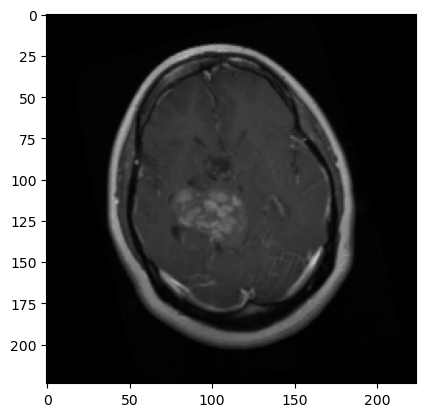

(16, 224, 224, 3)


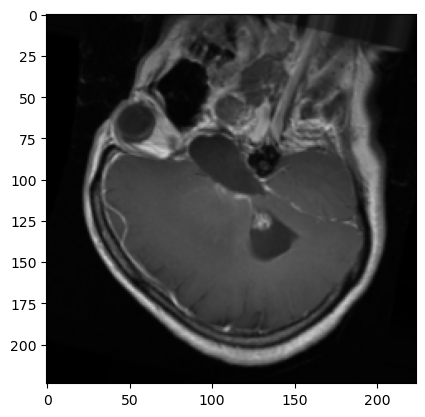

(16, 224, 224, 3)


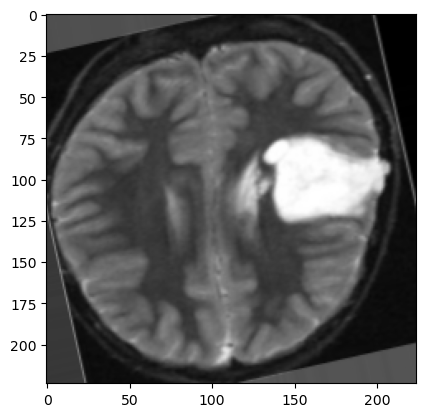

(16, 224, 224, 3)


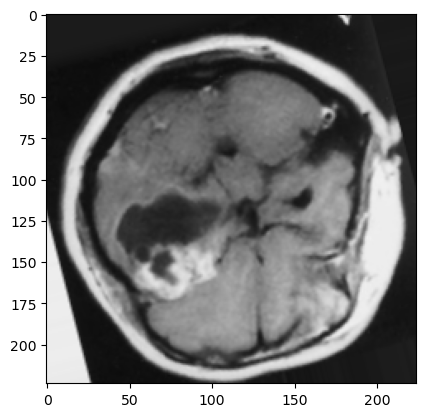

(16, 224, 224, 3)


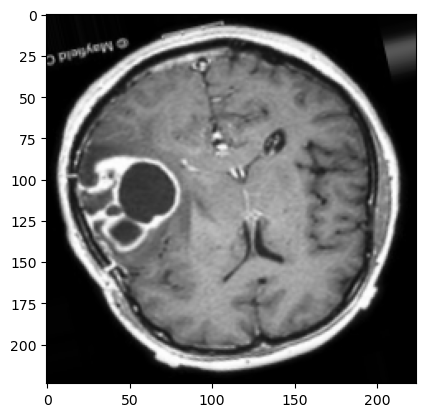

In [7]:
#display sample images of the validation brain images 
for x in range(5):
    img, label = next(validation)
    print(img.shape)   
    plt.imshow(img[0])
    plt.show()

## Define the Model

In [9]:
#clear any prior run data
tf.keras.backend.clear_session()

# Initialize the model
model = tf.keras.models.Sequential()

model.add(InputLayer(input_shape=(224,224,3))) #Define the input layer
model.add(Conv2D(filters=32,kernel_size=3, activation="relu")) #Definte the first conv layer
model.add(MaxPool2D()) #Maxpooling 
model.add(Conv2D(filters=64,kernel_size=3, activation="relu")) #Definte the second conv layer
model.add(MaxPool2D()) #Maxpooling 
model.add(Conv2D(filters=128,kernel_size=3, activation="relu")) #Definte the third conv layer
model.add(MaxPool2D()) #Maxpooling 

model.add(Flatten()) #Define the flattening layer

#Dense and Batch Normalization layers
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(1, activation="sigmoid"))
#Compile the model with Adam as an optimizer with a learning rate of .0001
model.compile(optimizer=keras.optimizers.Adam(0.0001),loss = keras.losses.BinaryCrossentropy(),metrics=['accuracy'])


In [10]:
#Define early stopping to prevent excessive run time. 
earlystopping = keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", 
                                        patience=5, restore_best_weights = True)

## Fit the Model

In [11]:
#To generate the full model, run without callbacks
model.fit(training,verbose=1,callbacks = [earlystopping],epochs=80,validation_data=(validation))

Epoch 1/80
231/231 [==============================] - 90s 385ms/step - loss: 0.6077 - accuracy: 0.6987 - val_loss: 0.5416 - val_accuracy: 0.7856
Epoch 2/80
231/231 [==============================] - 87s 377ms/step - loss: 0.4803 - accuracy: 0.7824 - val_loss: 0.4430 - val_accuracy: 0.7900
Epoch 3/80
231/231 [==============================] - 87s 377ms/step - loss: 0.3873 - accuracy: 0.8240 - val_loss: 0.6430 - val_accuracy: 0.6344
Epoch 4/80
231/231 [==============================] - 89s 385ms/step - loss: 0.3480 - accuracy: 0.8465 - val_loss: 0.2918 - val_accuracy: 0.8825
Epoch 5/80
231/231 [==============================] - 87s 378ms/step - loss: 0.3108 - accuracy: 0.8699 - val_loss: 0.3289 - val_accuracy: 0.8640
Epoch 6/80
231/231 [==============================] - 87s 376ms/step - loss: 0.2954 - accuracy: 0.8807 - val_loss: 0.2060 - val_accuracy: 0.9151
Epoch 7/80
231/231 [==============================] - 88s 381ms/step - loss: 0.2430 - accuracy: 0.8992 - val_loss: 0.1815 - val_ac

In [ ]:
#save the model for later use 
model.save('CNN.keras')

In [12]:
#Generate a summary of the compiled model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

## Generate Accuracy Metrics

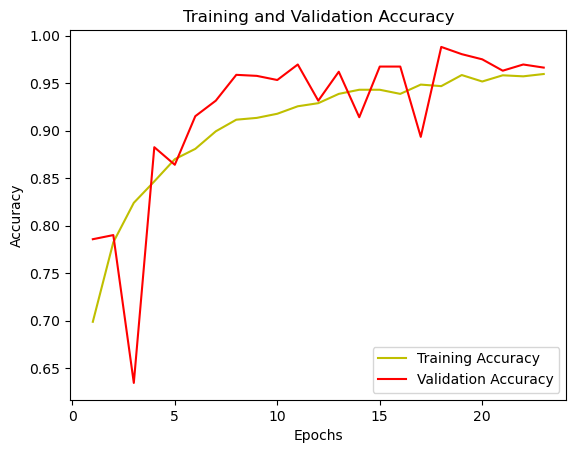

In [15]:
#plot the training and validation accuracy of each epoch
epochs = 80
accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'y', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
# Predict the values for the validation dataset
y_pred = model.predict(validation, callbacks = [earlystopping])

#Set the predicted value based on the probability score
Y_pred = [0 if num < .5 else 1 for num in y_pred]
Y_true = validation.classes 

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred) 

58/58 [==============================] - 11s 186ms/step


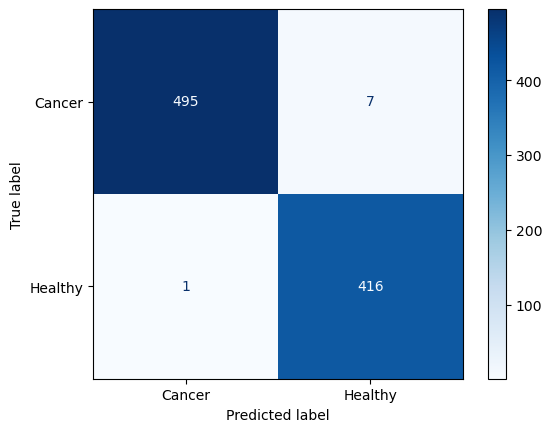

In [17]:
#Create the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mtx,
                             display_labels=['Cancer','Healthy'])
disp.plot(cmap='Blues')
plt.show()